In [1]:
import pandas as pd

# Load the Excel file
file_path = "All Data.xlsx"  # Replace with your actual file path
data = pd.read_excel(file_path)

# Rename columns for easier access
data.rename(columns={
    "Insured Damage, Adjusted ('000 US$)": "Insured_Damage_Adjusted",
    "Total Damage, Adjusted ('000 US$)": "Total_Damage_Adjusted"
}, inplace=True)

# Filter relevant columns
relevant_data = data[['Country', 'Disaster Type', 'Insured_Damage_Adjusted', 'Total_Damage_Adjusted']]

In [ ]:
# Remove rows with NaN values from the 'relevant_data' dataframe
relevant_data_clean = relevant_data.dropna()

# Check the resulting dataframe
print(relevant_data_clean.head())

                       Country Disaster Type  Insured_Damage_Adjusted  \
48    United States of America    Earthquake                6103998.0   
1036                     Japan    Earthquake                  49119.0   
1562  United States of America    Earthquake                 263377.0   
1658                 Nicaragua    Earthquake                 728661.0   
2140                     Japan    Earthquake                   9342.0   

      Total_Damage_Adjusted  
48               17769416.0  
1036              7859046.0  
1562              4161350.0  
1658              6157184.0  
2140              4040373.0  


In [ ]:
# Add a new column for the difference between Total_Damage_Adjusted and Insured_Damage_Adjusted
relevant_data_clean['damage_difference'] = relevant_data_clean['Total_Damage_Adjusted'] - relevant_data_clean['Insured_Damage_Adjusted']

# Check the resulting dataframe
print(relevant_data_clean.head())

                       Country Disaster Type  Insured_Damage_Adjusted  \
48    United States of America    Earthquake                6103998.0   
1036                     Japan    Earthquake                  49119.0   
1562  United States of America    Earthquake                 263377.0   
1658                 Nicaragua    Earthquake                 728661.0   
2140                     Japan    Earthquake                   9342.0   

      Total_Damage_Adjusted  damage_difference  
48               17769416.0         11665418.0  
1036              7859046.0          7809927.0  
1562              4161350.0          3897973.0  
1658              6157184.0          5428523.0  
2140              4040373.0          4031031.0  


C:\Users\milan\AppData\Local\Temp\ipykernel_25656\3817026118.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data_clean['damage_difference'] = relevant_data_clean['Total_Damage_Adjusted'] - relevant_data_clean['Insured_Damage_Adjusted']


In [ ]:
# Group by 'Country' to sum the damage_difference and count the number of disasters per country
country_summary = relevant_data_clean.groupby('Country').agg(
    total_damage_difference=('damage_difference', 'sum'),
    disaster_count=('damage_difference', 'count')
).reset_index()

# Check the resulting dataframe
print(country_summary.head())


               Country  total_damage_difference  disaster_count
0          Afghanistan                   8252.0               1
1             Anguilla                 240286.0               1
2  Antigua and Barbuda                 395777.0               2
3            Argentina                2693240.0               2
4            Australia               28687126.0              50


In [ ]:
# Add a new column for the mean damage difference per disaster
country_summary['mean_damage_difference'] = country_summary['total_damage_difference'] / country_summary['disaster_count']

# Check the resulting dataframe
print(country_summary.head())

               Country  total_damage_difference  disaster_count  \
0          Afghanistan                   8252.0               1   
1             Anguilla                 240286.0               1   
2  Antigua and Barbuda                 395777.0               2   
3            Argentina                2693240.0               2   
4            Australia               28687126.0              50   

   mean_damage_difference  
0                 8252.00  
1               240286.00  
2               197888.50  
3              1346620.00  
4               573742.52  


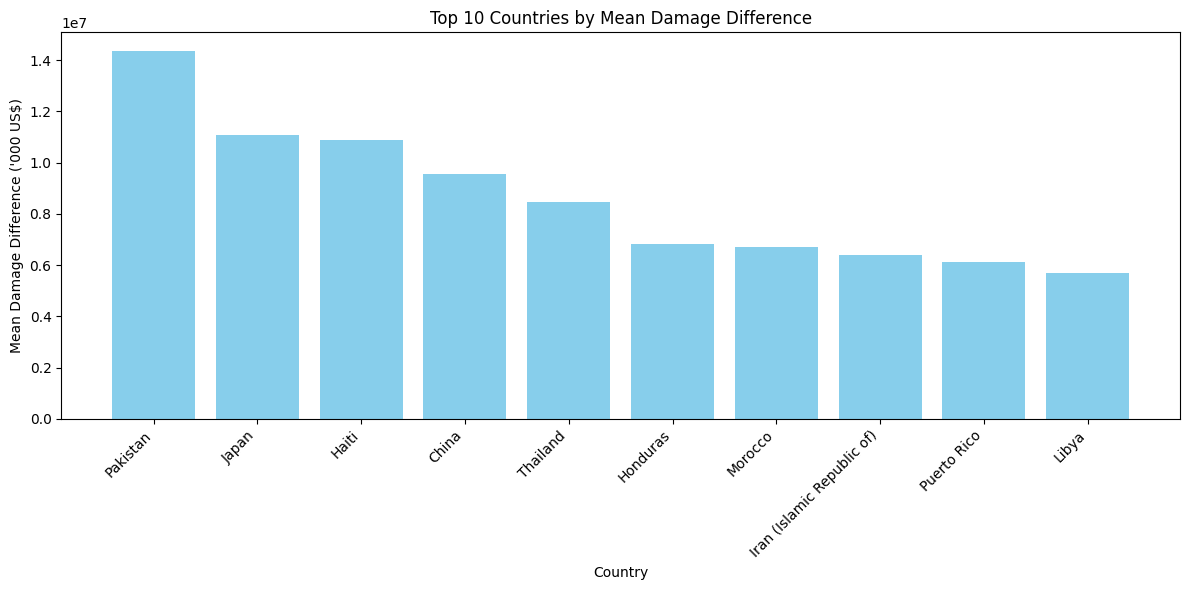

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the country_summary dataframe by 'mean_damage_difference' in descending order
top_10_countries = country_summary.sort_values(by='mean_damage_difference', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_countries['Country'], top_10_countries['mean_damage_difference'], color='skyblue')

plt.title("Top 10 Countries by Mean Damage Difference")
plt.xlabel("Country")
plt.ylabel("Mean Damage Difference ('000 US$)")

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

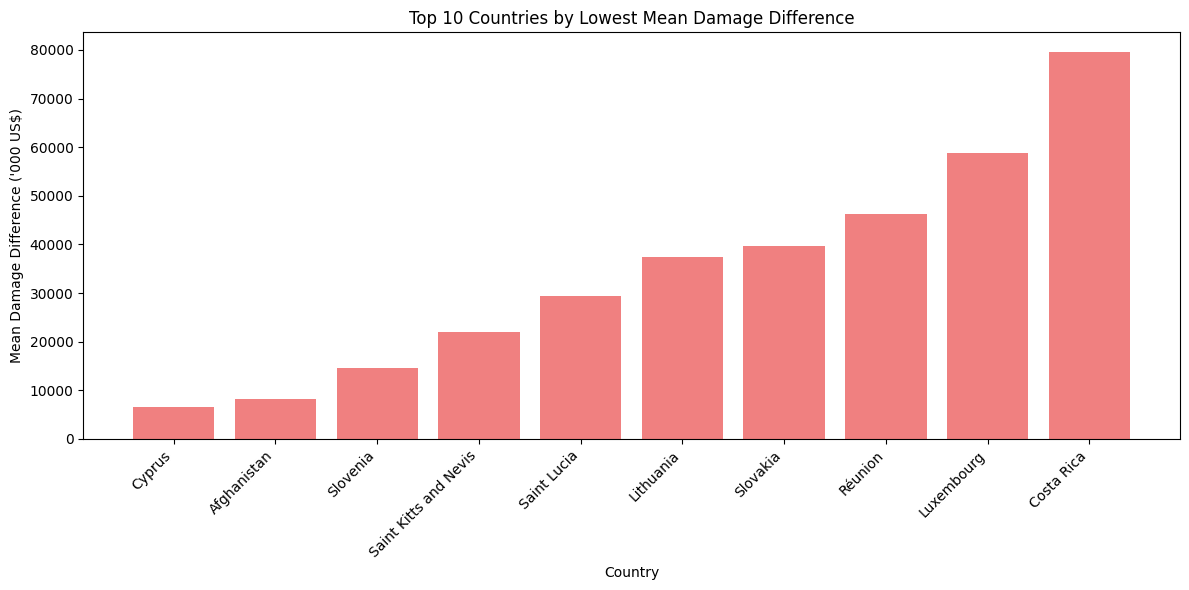

In [ ]:
# Sort the country_summary dataframe by 'mean_damage_difference' in ascending order
bottom_10_countries = country_summary.sort_values(by='mean_damage_difference', ascending=True).head(10)

plt.figure(figsize=(12, 6))
plt.bar(bottom_10_countries['Country'], bottom_10_countries['mean_damage_difference'], color='lightcoral')

plt.title("Top 10 Countries by Lowest Mean Damage Difference")
plt.xlabel("Country")
plt.ylabel("Mean Damage Difference ('000 US$)")

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


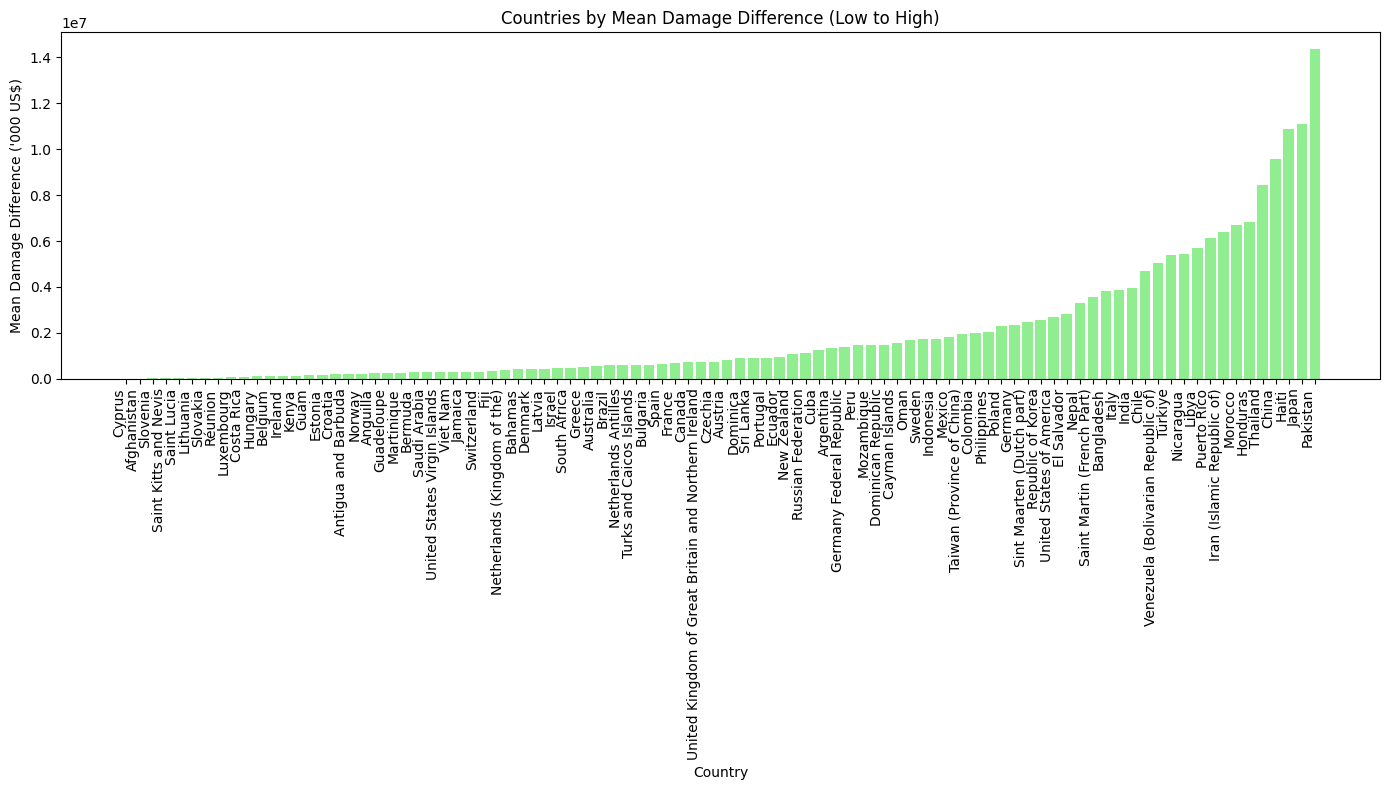

In [ ]:
# Sort the country_summary dataframe by 'mean_damage_difference' in ascending order
sorted_countries = country_summary.sort_values(by='mean_damage_difference', ascending=True)

plt.figure(figsize=(14, 8))
plt.bar(sorted_countries['Country'], sorted_countries['mean_damage_difference'], color='lightgreen')

plt.title("Countries by Mean Damage Difference (Low to High)")
plt.xlabel("Country")
plt.ylabel("Mean Damage Difference ('000 US$)")

plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Load the Excel file into a pandas dataframe
df = pd.read_excel("GDP_per_country.xls", engine='xlrd') 

print(df.head())

                  Country Name Country Code                Indicator Name  \
0                        Aruba          ABW  GDP per capita (current US$)   
1  Africa Eastern and Southern          AFE  GDP per capita (current US$)   
2                  Afghanistan          AFG  GDP per capita (current US$)   
3   Africa Western and Central          AFW  GDP per capita (current US$)   
4                       Angola          AGO  GDP per capita (current US$)   

   Indicator Code        1960        1961        1962        1963        1964  \
0  NY.GDP.PCAP.CD         NaN         NaN         NaN         NaN         NaN   
1  NY.GDP.PCAP.CD  186.132432  186.947182  197.408105  225.447007  209.005786   
2  NY.GDP.PCAP.CD         NaN         NaN         NaN         NaN         NaN   
3  NY.GDP.PCAP.CD  121.938353  127.452629  133.825452  139.006714  148.547736   
4  NY.GDP.PCAP.CD         NaN         NaN         NaN         NaN         NaN   

         1965  ...          2014          2015    

In [ ]:
df_new = df.iloc[:, [0, 1, 2, -1]]  # Select the first 3 columns and the last column

# Display the new dataframe
print(df_new.head())

                  Country Name Country Code                Indicator Name  \
0                        Aruba          ABW  GDP per capita (current US$)   
1  Africa Eastern and Southern          AFE  GDP per capita (current US$)   
2                  Afghanistan          AFG  GDP per capita (current US$)   
3   Africa Western and Central          AFW  GDP per capita (current US$)   
4                       Angola          AGO  GDP per capita (current US$)   

           2023  
0  33984.790620  
1   1659.515290  
2    415.707417  
3   1568.724310  
4   2308.159767  


In [ ]:
df_new.rename(columns={df_new.columns[-1]: 'GDP'}, inplace=True)


C:\Users\milan\AppData\Local\Temp\ipykernel_25656\3827403587.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.rename(columns={df_new.columns[-1]: 'GDP'}, inplace=True)


In [ ]:
# Load the Excel file
file_path = "All Data.xlsx"  
data = pd.read_excel(file_path)

# Print column names to verify exact matching
print(data.columns)

new_columns = ['DisNo.', 'ISO', 'Country', 'Subregion', 'Region',
               "Insured Damage, Adjusted ('000 US$)",
               "Total Damage, Adjusted ('000 US$)"]

missing_columns = [col for col in new_columns if col not in data.columns]
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    # Select the relevant columns if all are present
    relevant_data = data[new_columns]

    relevant_data.columns = relevant_data.columns.str.replace(r" \('000 US\$\)", "", regex=True)
    relevant_data['Insured Damage, Adjusted'] = relevant_data['Insured Damage, Adjusted'] * 1000
    relevant_data['Total Damage, Adjusted'] = relevant_data['Total Damage, Adjusted'] * 1000

    # Check the updated dataframe
    print(relevant_data.head())


Index(['DisNo.', 'Historic', 'Classification Key', 'Disaster Group',
       'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
       'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region',
       'Location', 'Origin', 'Associated Types', 'OFDA/BHA Response', 'Appeal',
       'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damage ('000 US$)', 'Insured Damage, Adjusted ('000 US$)',
       'Total Damage ('000 US$)', 'Total Damage, Adjusted ('000 US$)', 'CPI',
       'Admin Units', 'Entry Date', 'Last Update'],
      dtype='object')
          DisNo.  ISO                   Country  \
0  1900-0003-USA  USA  United S

C:\Users\milan\AppData\Local\Temp\ipykernel_25656\2150890315.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data['Insured Damage, Adjusted'] = relevant_data['Insured Damage, Adjusted'] * 1000
C:\Users\milan\AppData\Local\Temp\ipykernel_25656\2150890315.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data['Total Damage, Adjusted'] = relevant_data['Total Damage, Adjusted'] * 1000


In [ ]:
relevant_data_clean = relevant_data.dropna(subset=['Insured Damage, Adjusted', 'Total Damage, Adjusted'])

# Check the resulting dataframe
print(relevant_data_clean.head())

             DisNo.  ISO                   Country  \
48    1906-0013-USA  USA  United States of America   
1036  1964-0036-JPN  JPN                     Japan   
1562  1971-0016-USA  USA  United States of America   
1658  1972-0067-NIC  NIC                 Nicaragua   
2140  1978-0080-JPN  JPN                     Japan   

                            Subregion    Region  Insured Damage, Adjusted  \
48                   Northern America  Americas              6.103998e+09   
1036                     Eastern Asia      Asia              4.911900e+07   
1562                 Northern America  Americas              2.633770e+08   
1658  Latin America and the Caribbean  Americas              7.286610e+08   
2140                     Eastern Asia      Asia              9.342000e+06   

      Total Damage, Adjusted  
48              1.776942e+10  
1036            7.859046e+09  
1562            4.161350e+09  
1658            6.157184e+09  
2140            4.040373e+09  


In [ ]:
# Create a new column 'damage_difference' as the difference between 'Total Damage, Adjusted' and 'Insured Damage, Adjusted'
relevant_data_clean['damage_difference'] = relevant_data_clean['Total Damage, Adjusted'] - relevant_data_clean['Insured Damage, Adjusted']

# Check the resulting dataframe
relevant_data_clean

C:\Users\milan\AppData\Local\Temp\ipykernel_25656\2055076671.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data_clean['damage_difference'] = relevant_data_clean['Total Damage, Adjusted'] - relevant_data_clean['Insured Damage, Adjusted']


,DisNo.,ISO,Country,Subregion,Region,"Insured Damage, Adjusted","Total Damage, Adjusted",damage_difference
48,1906-0013-USA,USA,United States of America,Northern America,Americas,6.103998e+09,1.776942e+10,1.166542e+10
1036,1964-0036-JPN,JPN,Japan,Eastern Asia,Asia,4.911900e+07,7.859046e+09,7.809927e+09
1562,1971-0016-USA,USA,United States of America,Northern America,Americas,2.633770e+08,4.161350e+09,3.897973e+09
1658,1972-0067-NIC,NIC,Nicaragua,Latin America and the Caribbean,Americas,7.286610e+08,6.157184e+09,5.428523e+09
2140,1978-0080-JPN,JPN,Japan,Eastern Asia,Asia,9.342000e+06,4.040373e+09,4.031031e+09
...,...,...,...,...,...,...,...,...
16798,2023-0600-MAR,MAR,Morocco,Northern Africa,Africa,3.000000e+08,7.000000e+09,6.700000e+09
16804,2023-0610-LBY,LBY,Libya,Northern Africa,Africa,5.000000e+08,6.200000e+09,5.700000e+09
16829,2023-0675-MEX,MEX,Mexico,Latin America and the Caribbean,Americas,4.000000e+09,1.200000e+10,8.000000e+09
16908,2023-0838-CHN,CHN,China,Eastern Asia,Asia,2.800000e+06,1.000000e+09,9.972000e+08


In [ ]:
# Group by 'Country' and aggregate the necessary columns
grouped_data = relevant_data_clean.groupby(['Country', 'ISO', 'Region']).agg(
    damage_difference_sum=('damage_difference', 'sum'),
    disaster_count=('damage_difference', 'count')
).reset_index()

# Check the resulting dataframe
print(grouped_data.head())

               Country  ISO    Region  damage_difference_sum  disaster_count
0          Afghanistan  AFG      Asia           8.252000e+06               1
1             Anguilla  AIA  Americas           2.402860e+08               1
2  Antigua and Barbuda  ATG  Americas           3.957770e+08               2
3            Argentina  ARG  Americas           2.693240e+09               2
4            Australia  AUS   Oceania           2.868713e+10              50


In [ ]:
# Add a new column for the mean damage difference per disaster
grouped_data['mean_damage_difference'] = grouped_data['damage_difference_sum'] / grouped_data['disaster_count']

# Check the resulting dataframe
print(grouped_data.head())

               Country  ISO    Region  damage_difference_sum  disaster_count  \
0          Afghanistan  AFG      Asia           8.252000e+06               1   
1             Anguilla  AIA  Americas           2.402860e+08               1   
2  Antigua and Barbuda  ATG  Americas           3.957770e+08               2   
3            Argentina  ARG  Americas           2.693240e+09               2   
4            Australia  AUS   Oceania           2.868713e+10              50   

   mean_damage_difference  
0            8.252000e+06  
1            2.402860e+08  
2            1.978885e+08  
3            1.346620e+09  
4            5.737425e+08  


In [ ]:
# Merge the grouped_data with df_new based on 'ISO' and 'Country Code'
merged_data = pd.merge(grouped_data, df_new, left_on='ISO', right_on='Country Code', how='left')

# Check the resulting merged dataframe
print(merged_data.head())

               Country  ISO    Region  damage_difference_sum  disaster_count  \
0          Afghanistan  AFG      Asia           8.252000e+06               1   
1             Anguilla  AIA  Americas           2.402860e+08               1   
2  Antigua and Barbuda  ATG  Americas           3.957770e+08               2   
3            Argentina  ARG  Americas           2.693240e+09               2   
4            Australia  AUS   Oceania           2.868713e+10              50   

   mean_damage_difference         Country Name Country Code  \
0            8.252000e+06          Afghanistan          AFG   
1            2.402860e+08                  NaN          NaN   
2            1.978885e+08  Antigua and Barbuda          ATG   
3            1.346620e+09            Argentina          ARG   
4            5.737425e+08            Australia          AUS   

                 Indicator Name           GDP  
0  GDP per capita (current US$)    415.707417  
1                           NaN           Na

In [ ]:
# Remove rows with NaN values in the 'Country Name' and 'Country Code' columns
merged_data_clean = merged_data.dropna(subset=['Country Name', 'Country Code'])

# Check the resulting dataframe
merged_data_clean

,Country,ISO,Region,damage_difference_sum,disaster_count,mean_damage_difference,Country Name,Country Code,Indicator Name,GDP
0,Afghanistan,AFG,Asia,8.252000e+06,1,8.252000e+06,Afghanistan,AFG,GDP per capita (current US$),415.707417
2,Antigua and Barbuda,ATG,Americas,3.957770e+08,2,1.978885e+08,Antigua and Barbuda,ATG,GDP per capita (current US$),21787.101732
3,Argentina,ARG,Americas,2.693240e+09,2,1.346620e+09,Argentina,ARG,GDP per capita (current US$),14187.482725
4,Australia,AUS,Oceania,2.868713e+10,50,5.737425e+08,Australia,AUS,GDP per capita (current US$),64820.911789
5,Austria,AUT,Europe,5.801932e+09,7,8.288474e+08,Austria,AUT,GDP per capita (current US$),56033.573792
...,...,...,...,...,...,...,...,...,...,...
87,United Kingdom of Great Britain and Northern I...,GBR,Europe,2.275340e+10,31,7.339806e+08,United Kingdom,GBR,GDP per capita (current US$),49463.855462
88,United States Virgin Islands,VIR,Americas,9.090260e+08,3,3.030087e+08,Virgin Islands (U.S.),VIR,GDP per capita (current US$),NaN
89,United States of America,USA,Americas,8.320983e+11,307,2.710418e+09,United States,USA,GDP per capita (current US$),82769.412211
90,Venezuela (Bolivarian Republic of),VEN,Americas,5.048636e+09,1,5.048636e+09,"Venezuela, RB",VEN,GDP per capita (current US$),NaN


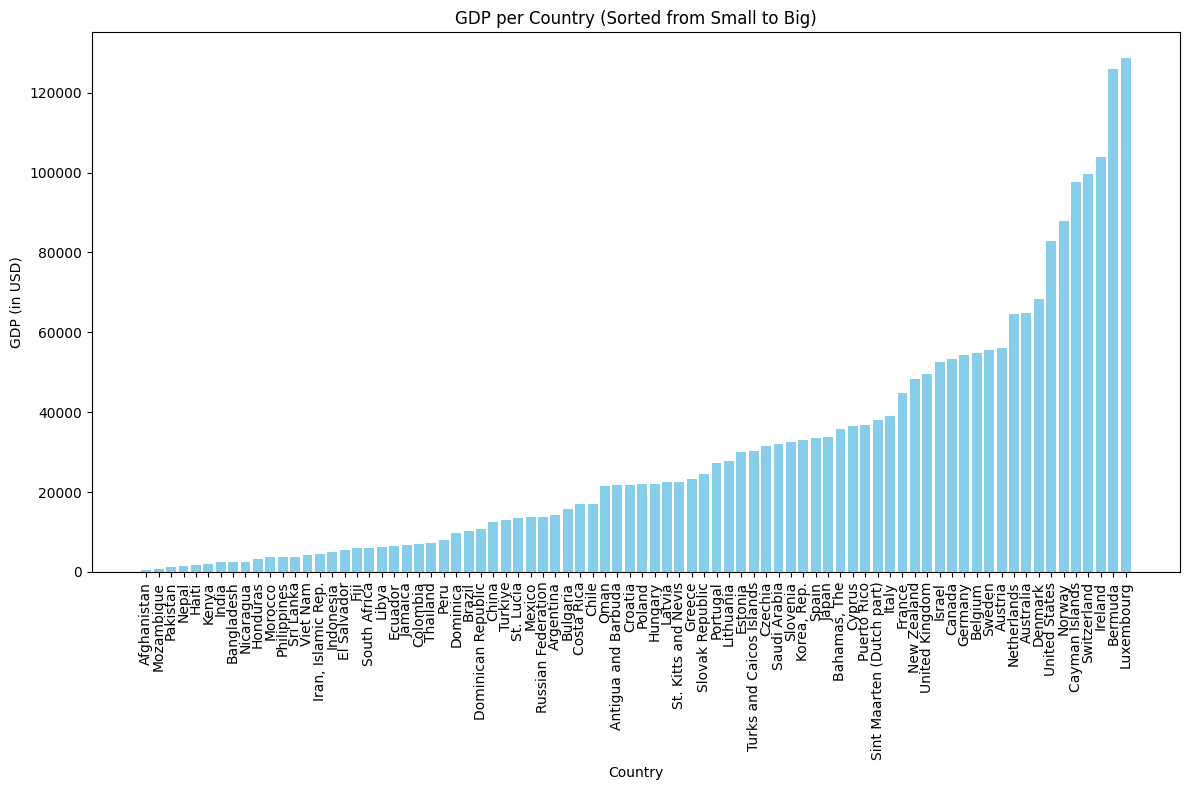

In [ ]:
# Sort the merged_data dataframe by the 'GDP' column in ascending order
merged_data_sorted = merged_data.dropna(subset=['GDP', 'Country Name']).sort_values(by='GDP', ascending=True)

# Plot GDP per country with switched axes
plt.figure(figsize=(12, 8))
plt.bar(merged_data_sorted['Country Name'], merged_data_sorted['GDP'], color='skyblue')
plt.ylabel('GDP (in USD)')
plt.xlabel('Country')
plt.title('GDP per Country (Sorted from Small to Big)')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [ ]:
import scipy.stats as stats

# Ensure 'mean_damage_difference' and 'GDP' columns are not null for correlation calculation
merged_data_clean = merged_data.dropna(subset=['mean_damage_difference', 'GDP'])

# Pearson correlation
pearson_corr, pearson_p_value = stats.pearsonr(merged_data_clean['mean_damage_difference'], merged_data_clean['GDP'])
print(f"Pearson correlation: {pearson_corr}, P-value: {pearson_p_value}")

# Spearman correlation
spearman_corr, spearman_p_value = stats.spearmanr(merged_data_clean['mean_damage_difference'], merged_data_clean['GDP'])
print(f"Spearman correlation: {spearman_corr}, P-value: {spearman_p_value}")

Pearson correlation: -0.30508489030930974, P-value: 0.0059278310978301135
Spearman correlation: -0.3442100328176278, P-value: 0.001769727023068848


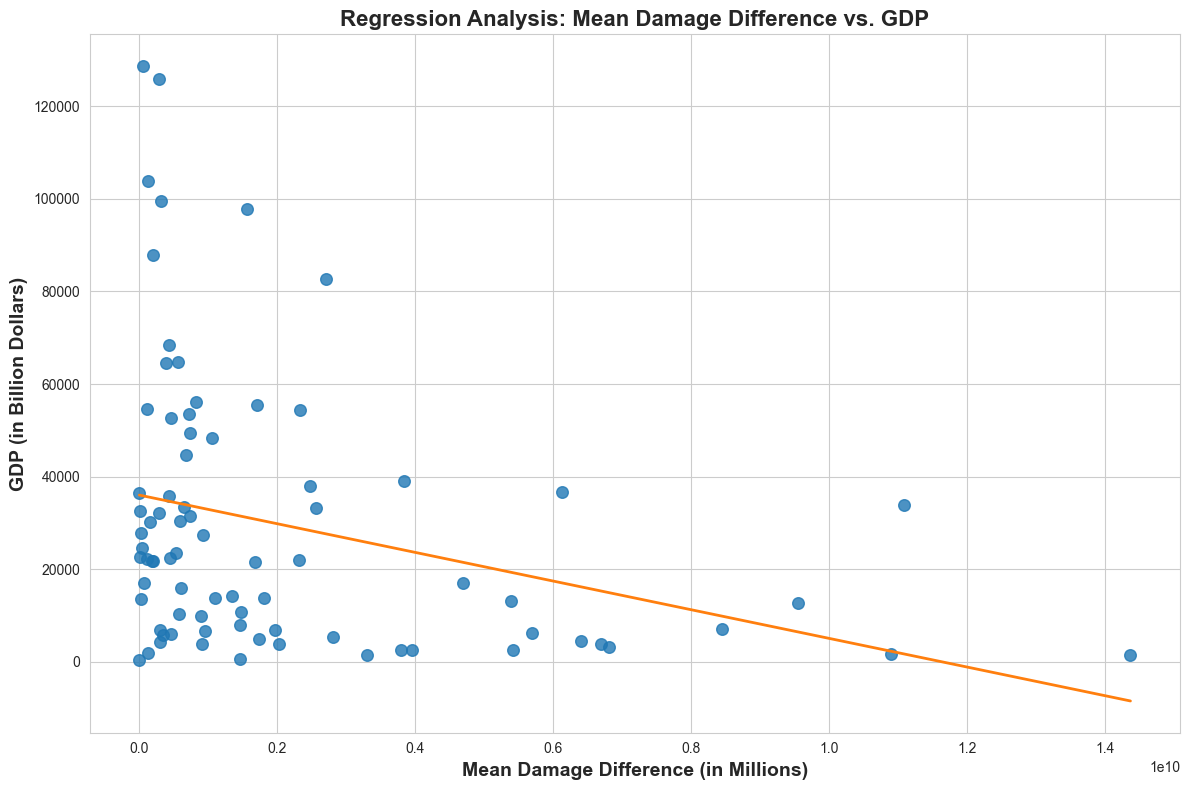

: 

In [ ]:
sns.set_style("whitegrid")
sns.set_palette("deep")
plt.figure(figsize=(12, 8))

sns.regplot(
    x='mean_damage_difference', 
    y='GDP', 
    data=merged_data_clean, 
    scatter_kws={'s': 70, 'color': '#1f77b4'},  
    line_kws={'color': '#ff7f0e', 'linewidth': 2},  
    ci=None  
)
plt.title('Regression Analysis: Mean Damage Difference vs. GDP', fontsize=16, weight='bold')
plt.xlabel('Mean Damage Difference (in Millions)', fontsize=14, weight='bold')
plt.ylabel('GDP (in Billion Dollars)', fontsize=14, weight='bold')

plt.tight_layout()

plt.show()